In [1]:
from python.bsplines import BasisSpline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def spline_function(p, control_points, knots, res=1000):
    """
    Given a degree p, n control points and n + p + 1 knots, computes the spline
    function and returns a set of function values.

    @TODO: Currently relying on the control points being in R^2. Generalize.
    @TODO: Assuming the right number of knots are provided.
    """
    c = np.array(control_points)
    n = len(c)
    B = BasisSpline(p)
    k = knots 
    t_values = np.linspace(k[p], k[-(p+1)], res)
    f_values = np.zeros((res, 2))
    
    for i, t in enumerate(t_values):
        f_values[i] = sum([c[j] * B(j, t, k) for j in range(n)])
    
    return t_values, f_values

In [3]:
def demo(n=10):
    p = 2  # degree of basis splines
    c = np.array([(i, np.random.randint(-10, 10)) for i in range(n)])
    k = range(n + p + 1) # uniform knots

    x, y = spline_function(p, c, k)
    plt.scatter(*zip(*c), s=100)
    plt.plot(*zip(*c), alpha=0.7, c='grey')
    plt.plot(*zip(*y))
    plt.show()

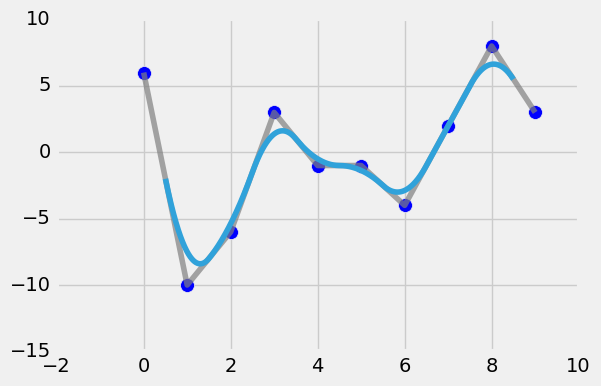

In [4]:
if __name__ == "__main__":
    demo(10)